# Simulating simple D/D/c queues

In [16]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

SAMPLE_SIZE = 100
ARRIVAL_INTERVAL = 100
EXECUTION_INTERVAL = 120
EXECUTORS = 1

## An example arrival time distribution

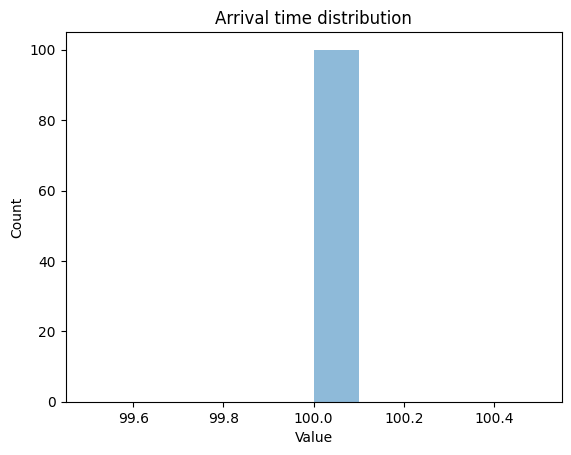

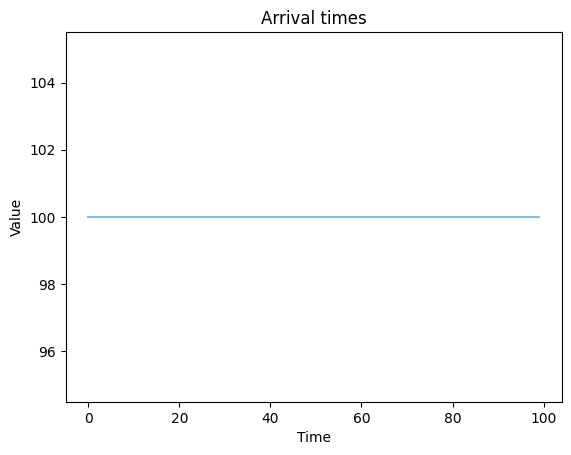

Mean arrival time: 100.0


In [17]:
inter_arrival_time = np.full(shape=SAMPLE_SIZE, dtype=int, fill_value=ARRIVAL_INTERVAL)

plt.title("Arrival time distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(inter_arrival_time, alpha=0.5)
plt.show()

plt.title("Arrival times")
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(inter_arrival_time, alpha=0.5)
plt.show()

print(f'Mean arrival time: {inter_arrival_time.mean()}')

## Queue length over time

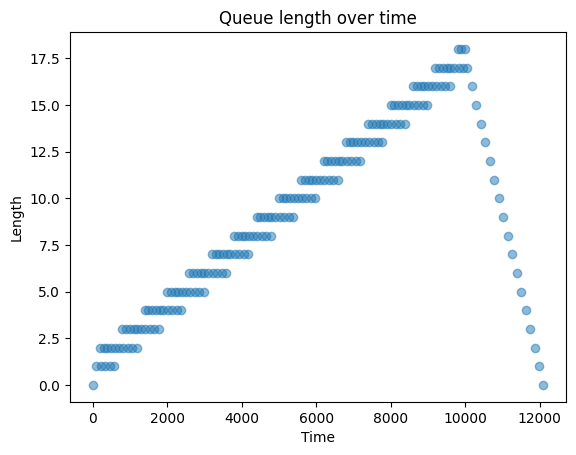

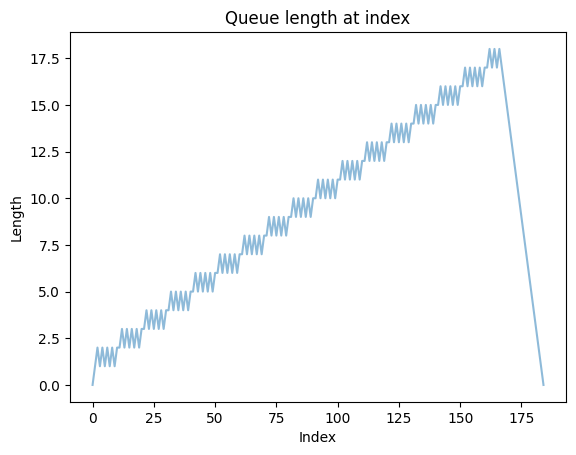

Mean queue length: 9.178378378378378


In [18]:
from src.queue import Queue

queue = Queue(inter_arrival_time, np.full(shape=SAMPLE_SIZE, dtype=int, fill_value=EXECUTION_INTERVAL), executors=EXECUTORS)
queue.process()

plt.title("Queue length over time")
plt.xlabel("Time")
plt.ylabel("Length")
plt.scatter(*zip(*queue.length_with_timestamps), alpha=0.5)
plt.show()

plt.title("Queue length at index")
plt.xlabel("Index")
plt.ylabel("Length")
plt.plot(queue.length, alpha=0.5)
plt.show()

print(f'Mean queue length: {queue.length.mean()}')


## Departure time and distribution

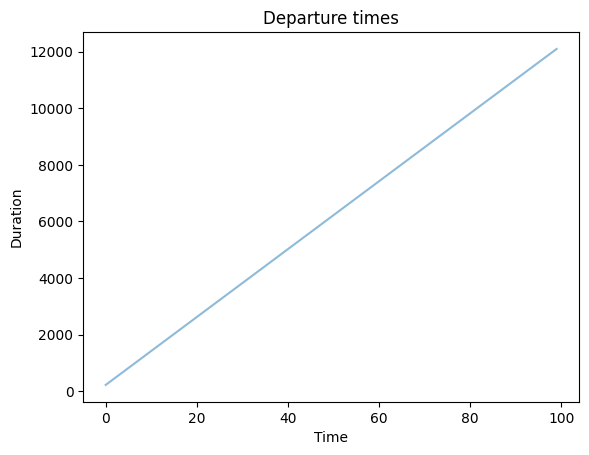

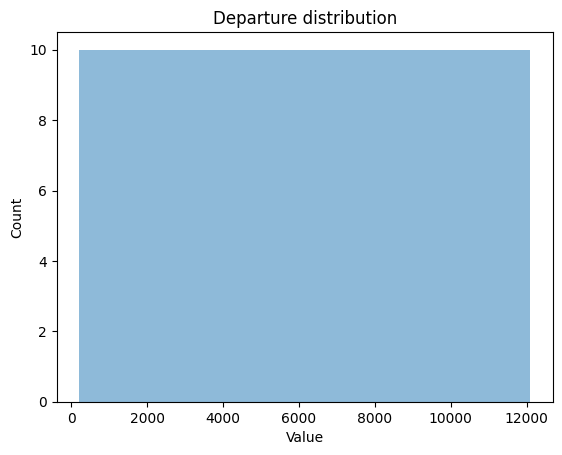

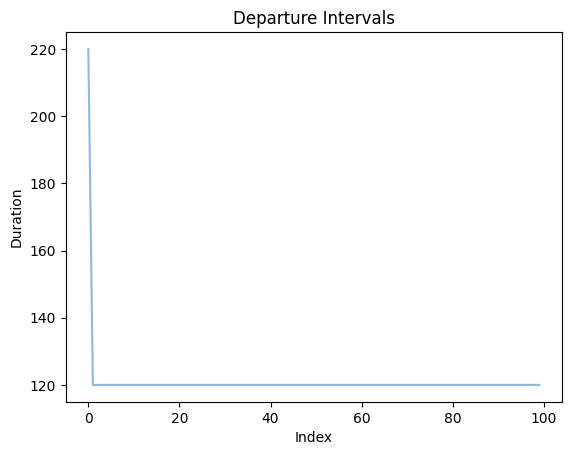

In [19]:
from src.queue import timestamps_to_intervals

plt.title("Departure times")
plt.xlabel("Time")
plt.ylabel("Duration")
plt.plot(queue.departure_times, alpha=0.5)
plt.show()

plt.title("Departure distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(queue.departure_times, alpha=0.5)
plt.show()

plt.title("Departure Intervals")
plt.xlabel("Index")
plt.ylabel("Duration")
plt.plot(timestamps_to_intervals(queue.departure_times), alpha=0.5)
plt.show()

plt.show()

## Wait time and distribution

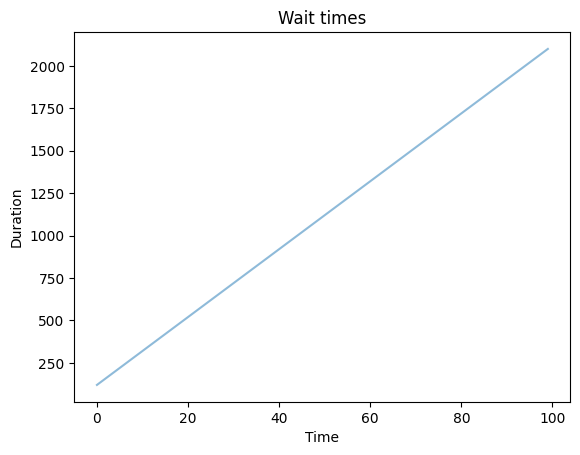

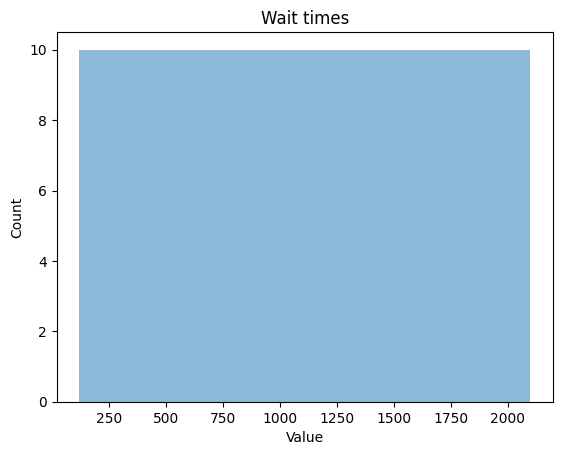

Mean wait time: 1110.0


In [20]:
plt.title("Wait times")
plt.xlabel("Time")
plt.ylabel("Duration")
plt.plot(queue.wait_times, alpha=0.5)
plt.show()

plt.title("Wait times")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(queue.wait_times, alpha=0.5)
plt.show()

print(f'Mean wait time: {queue.wait_times.mean()}')

# Utilization

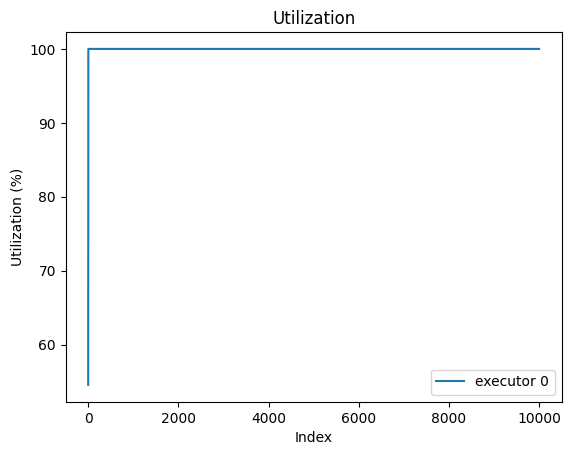

In [11]:
plt.title("Utilization")
plt.xlabel("Index")
plt.ylabel("Utilization (%)")
# plot lines 
plt.plot(queue.utilization(0) * 100, label = "executor 0") 
# plt.plot(queue.utilization(1) * 100, label = "executor 1") 
plt.legend() 
plt.show()